## Frequency response plots

Frequency responses are very easy to calculate numerically if we remember that the frequency domain is basically the part of the Laplace domain on the imaginary axis, or mathematically $s=i\omega$

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Frequency responses often make use of logarithmic scales, so we'll generate logaritmically spaced points. This will be linearly spaced on a logarithmic scale:

In [2]:
omega = numpy.logspace(-2, 2, 1000)

In [3]:
s = omega*1j

As an example, we can use a second order transfer function:

In [4]:
tau = 1

In [5]:
zeta = 0.5

In [6]:
G = 1/(tau**2*s**2 + 2*tau*zeta*s + 1)

## Bode

Bode diagrams are the most common plots. The magnitude and angle of the frequency response is shown as a function of frequency. This is such a common representation that when most control engineers say somthing like "Show me the Frequency response" they will mean "Show me a bode diagram".

In [7]:
def bode(G):
    plt.subplot(2, 1, 1)
    plt.loglog(omega, numpy.abs(G))
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, numpy.angle(G))

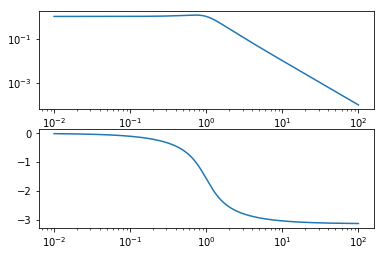

In [8]:
bode(G)

## Nyquist

Nyquist diagrams are simply the real and imaginary components of the frequency response plotted on a plane. By convention not only the positive frequencies are plotted but the negative as well. This is the image of $G(s)$ as $s$ traverses the entire imaginary line.


In [9]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.axis('equal')

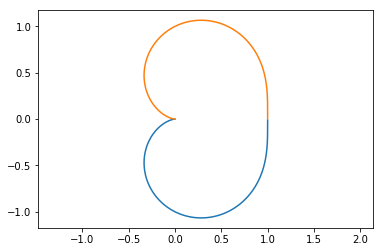

In [10]:
nyquist(G)

## With the control library

The control library saves us some typing to create these diagrams:

In [11]:
import control

In [12]:
G = control.tf(1, [tau**2, 2*tau*zeta, 1])

/Users/alchemyst/anaconda3/lib/python3.6/site-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/Users/alchemyst/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/alchemyst/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/alchemyst/anaconda3/lib/python3.6/site-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)

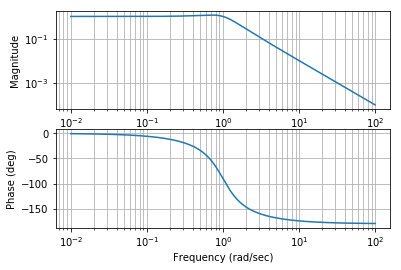

In [13]:
control.bode(G, omega);

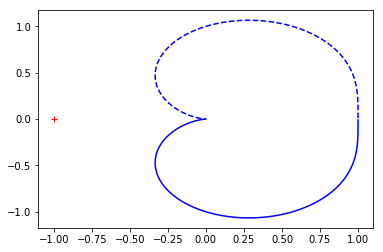

In [14]:
control.nyquist_plot(G, omega);